In [21]:
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import seaborn as sns

In [22]:
import pandas as pd

urls = {
    'Loja 1': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    'Loja 2': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    'Loja 3': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    'Loja 4': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv",
}

lojas_df = {}

for loja, url in urls.items():
  lojas_df[loja] = pd.read_csv(url)

# **1. Análise do faturamento**

In [23]:
soma_loja_1 = lojas_df['Loja 1']['Preço'].sum()
soma_loja_2 = lojas_df['Loja 2']['Preço'].sum()
soma_loja_3 = lojas_df['Loja 3']['Preço'].sum()
soma_loja_4 = lojas_df['Loja 4']['Preço'].sum()

In [24]:
faturamento_lojas = {
    'Loja 1': soma_loja_1,
    'Loja 2': soma_loja_2,
    'Loja 3': soma_loja_3,
    'Loja 4': soma_loja_4
}

print("Faturamento por Loja:")
for loja, valor in faturamento_lojas.items():
    print(f"{loja}: R$ {valor:,.2f}")

Faturamento por Loja:
Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58


# **2. Vendas por Categoria**

In [25]:
produtos_por_categoria = {}

for nome_loja, df_loja in zip(
    ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    [lojas_df['Loja 1'], lojas_df['Loja 2'], lojas_df['Loja 3'], lojas_df['Loja 4']]
):

    contagem = df_loja.groupby('Categoria do Produto')['Preço'].count().reset_index()
    contagem.columns = ['Categoria do Produto', 'Quantidade']
    contagem = contagem.sort_values('Quantidade', ascending=False)

    produtos_por_categoria[nome_loja] = contagem

for i in range(1, 5):
    nome_loja = f'Loja {i}'
    print(f"\nProdutos vendidos por categoria - {nome_loja}:")
    print(produtos_por_categoria[nome_loja].to_markdown(index=False))


Produtos vendidos por categoria - Loja 1:
| Categoria do Produto   |   Quantidade |
|:-----------------------|-------------:|
| moveis                 |          465 |
| eletronicos            |          448 |
| brinquedos             |          324 |
| eletrodomesticos       |          312 |
| esporte e lazer        |          284 |
| instrumentos musicais  |          182 |
| livros                 |          173 |
| utilidades domesticas  |          171 |

Produtos vendidos por categoria - Loja 2:
| Categoria do Produto   |   Quantidade |
|:-----------------------|-------------:|
| moveis                 |          442 |
| eletronicos            |          422 |
| brinquedos             |          313 |
| eletrodomesticos       |          305 |
| esporte e lazer        |          275 |
| instrumentos musicais  |          224 |
| livros                 |          197 |
| utilidades domesticas  |          181 |

Produtos vendidos por categoria - Loja 3:
| Categoria do Produto   |   Qu

In [26]:
for nome_loja, df in produtos_por_categoria.items():
    total_vendas = df['Quantidade'].sum()
    df['Participação (%)'] = (df['Quantidade'] / total_vendas * 100).round(2)

for nome_loja, df in produtos_por_categoria.items():
    print(f"\n{nome_loja}:")
    print(df.to_markdown(index=False))


Loja 1:
| Categoria do Produto   |   Quantidade |   Participação (%) |
|:-----------------------|-------------:|-------------------:|
| moveis                 |          465 |              19.71 |
| eletronicos            |          448 |              18.99 |
| brinquedos             |          324 |              13.73 |
| eletrodomesticos       |          312 |              13.23 |
| esporte e lazer        |          284 |              12.04 |
| instrumentos musicais  |          182 |               7.72 |
| livros                 |          173 |               7.33 |
| utilidades domesticas  |          171 |               7.25 |

Loja 2:
| Categoria do Produto   |   Quantidade |   Participação (%) |
|:-----------------------|-------------:|-------------------:|
| moveis                 |          442 |              18.74 |
| eletronicos            |          422 |              17.89 |
| brinquedos             |          313 |              13.27 |
| eletrodomesticos       |          3

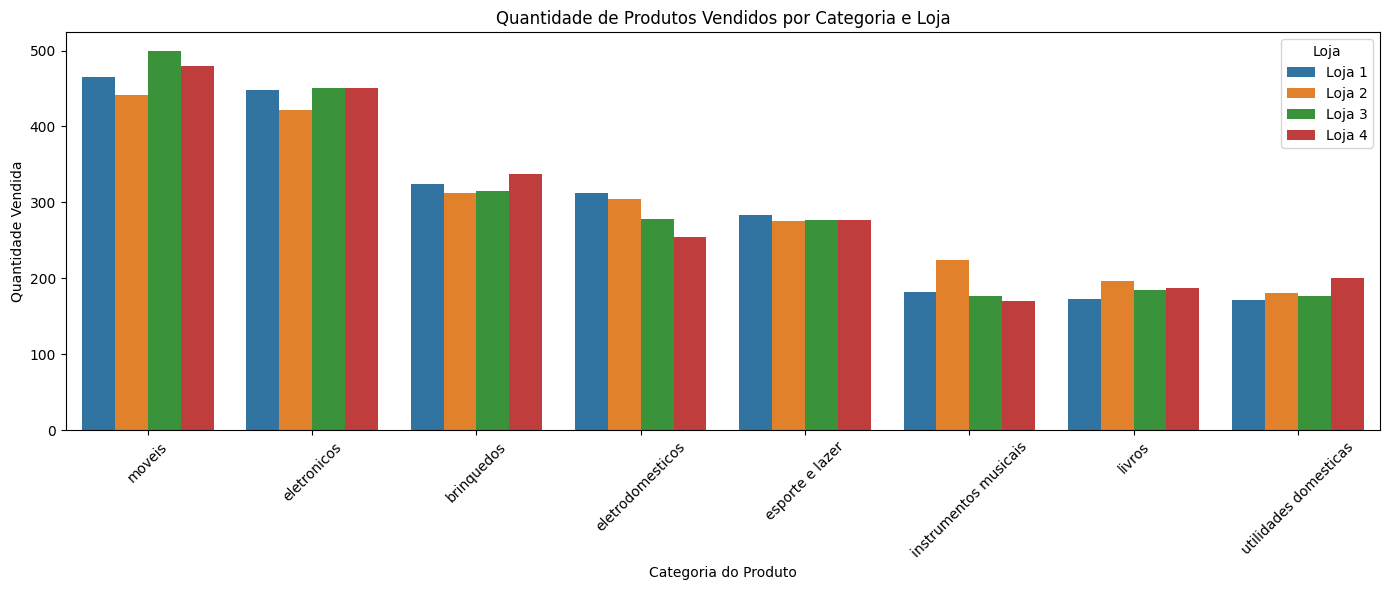

In [27]:
categoria_total = pd.DataFrame()

for nome_loja, df in produtos_por_categoria.items():
    df_temp = df.copy()
    df_temp['Loja'] = nome_loja
    total_vendas = df_temp['Quantidade'].sum()
    df_temp['Participação (%)'] = (df_temp['Quantidade'] / total_vendas * 100).round(2)
    categoria_total = pd.concat([categoria_total, df_temp], ignore_index=True)

plt.figure(figsize=(14, 6))
sns.barplot(data=categoria_total, x='Categoria do Produto', y='Quantidade', hue='Loja')
plt.title('Quantidade de Produtos Vendidos por Categoria e Loja')
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.legend(title='Loja')
plt.tight_layout()
plt.show()

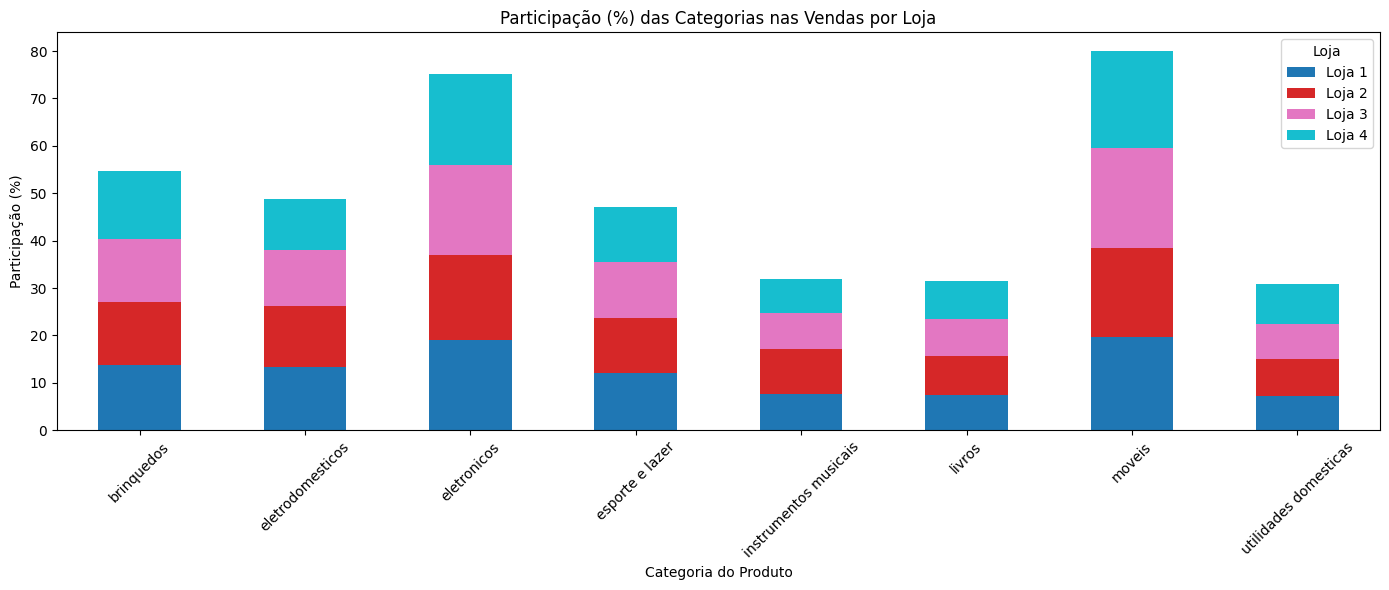

In [28]:
categoria_pct = categoria_total.pivot_table(
    index='Categoria do Produto',
    columns='Loja',
    values='Participação (%)'
).fillna(0)

categoria_pct.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab10')
plt.title('Participação (%) das Categorias nas Vendas por Loja')
plt.xlabel('Categoria do Produto')
plt.ylabel('Participação (%)')
plt.xticks(rotation=45)
plt.legend(title='Loja')
plt.tight_layout()
plt.show()

# **3. Média de Avaliaçoes das Lojas**

In [29]:
media_avaliacoes = {}

for i in range(1,5):
  nome_loja = f"Loja {i}"
  df_loja = lojas_df[nome_loja]

  media = df_loja['Avaliação da compra'].mean()
  media_avaliacoes[nome_loja] = media

for loja, media in media_avaliacoes.items():
    print(f"{loja}: {media:.2f}")

Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00


/tmp/ipython-input-525442277.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lojas, y=avaliacoes, palette='Blues_d')


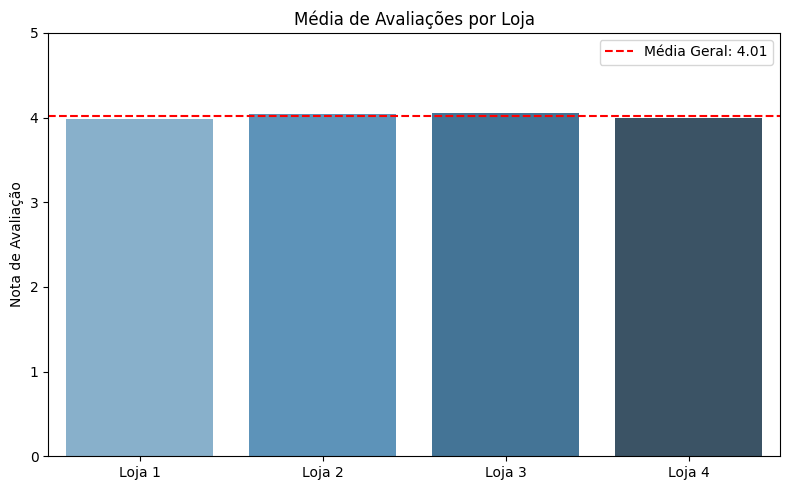

In [30]:
plt.figure(figsize=(8, 5))

lojas = list(media_avaliacoes.keys())
avaliacoes = list(media_avaliacoes.values())
media_geral = sum(avaliacoes) / len(avaliacoes)

sns.barplot(x=lojas, y=avaliacoes, palette='Blues_d')
plt.axhline(media_geral, color='red', linestyle='--', label=f'Média Geral: {media_geral:.2f}')
plt.title('Média de Avaliações por Loja')
plt.ylabel('Nota de Avaliação')
plt.ylim(0, 5)
plt.legend()
plt.tight_layout()
plt.show()

# **4. Produtos Mais e Menos Vendidos**

In [31]:
produtos_por_loja = {}

for i in range(1,5):
  nome_loja = f"Loja {i}"
  df_loja = lojas_df[nome_loja]

  vendas_por_produto = df_loja['Produto'].value_counts().reset_index()
  vendas_por_produto.columns = ['Produto', 'Vendas']
  vendas_por_produto = vendas_por_produto.sort_values('Vendas', ascending=False)
  produtos_por_loja[nome_loja] = vendas_por_produto

for nome_loja, df in produtos_por_loja.items():
    print(f"\n{nome_loja} - Produtos Vendidos:")
    top_10 = df.head(5)
    top_final_10 = df.tail(5)
    print(top_10.to_markdown(index=False))
    print(top_final_10.to_markdown(index=False))


Loja 1 - Produtos Vendidos:
| Produto            |   Vendas |
|:-------------------|---------:|
| Micro-ondas        |       60 |
| TV Led UHD 4K      |       60 |
| Guarda roupas      |       60 |
| Secadora de roupas |       58 |
| Cômoda             |       56 |
| Produto                     |   Vendas |
|:----------------------------|---------:|
| Ciência de dados com python |       39 |
| Pandeiro                    |       36 |
| Panela de pressão           |       35 |
| Headset                     |       33 |
| Celular ABXY                |       33 |

Loja 2 - Produtos Vendidos:
| Produto                  |   Vendas |
|:-------------------------|---------:|
| Iniciando em programação |       65 |
| Micro-ondas              |       62 |
| Bateria                  |       61 |
| Violão                   |       58 |
| Pandeiro                 |       58 |
| Produto           |   Vendas |
|:------------------|---------:|
| Fone de ouvido    |       37 |
| Poltrona          |   

/tmp/ipython-input-2986892251.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vendas', y='Produto', data=top_5, palette='Greens_r')


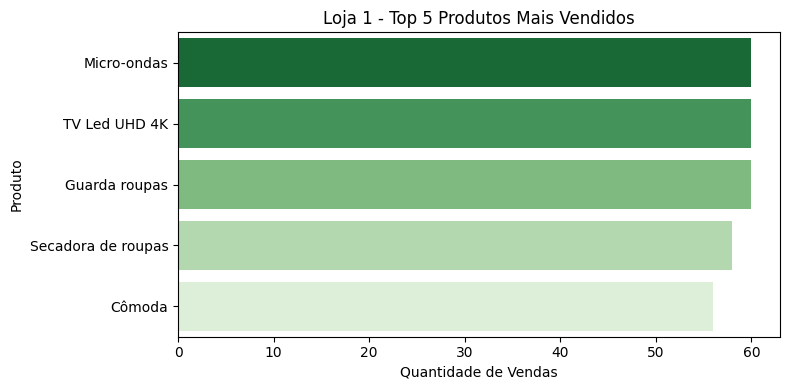

/tmp/ipython-input-2986892251.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vendas', y='Produto', data=top_5, palette='Greens_r')


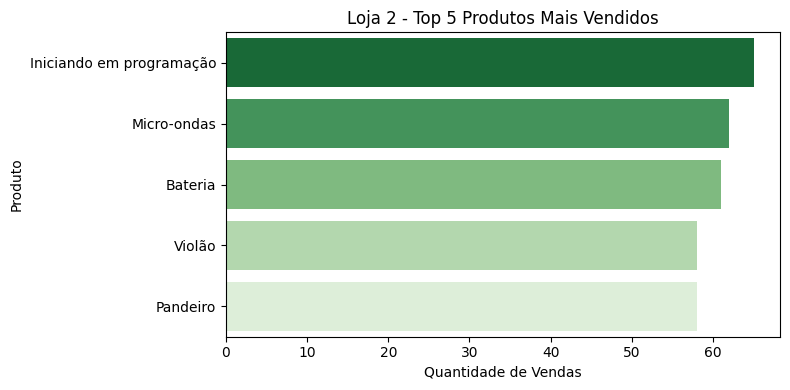

/tmp/ipython-input-2986892251.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vendas', y='Produto', data=top_5, palette='Greens_r')


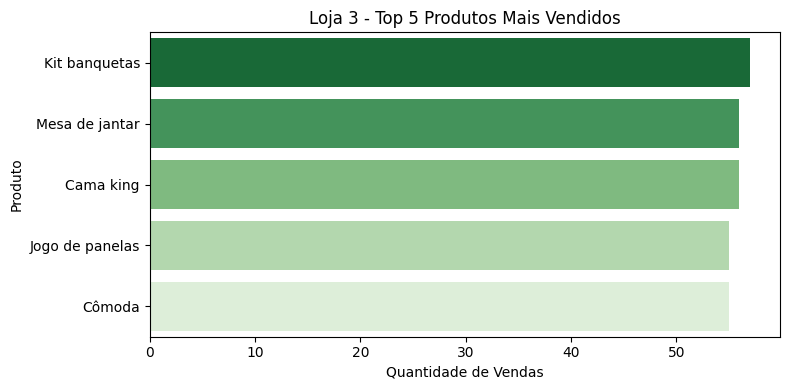

/tmp/ipython-input-2986892251.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vendas', y='Produto', data=top_5, palette='Greens_r')


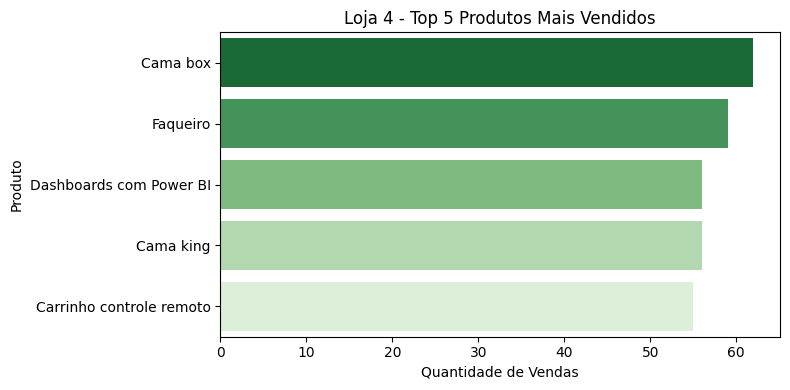

In [32]:
for nome_loja, df in produtos_por_loja.items():
    top_5 = df.head(5)

    plt.figure(figsize=(8, 4))
    sns.barplot(x='Vendas', y='Produto', data=top_5, palette='Greens_r')
    plt.title(f'{nome_loja} - Top 5 Produtos Mais Vendidos')
    plt.xlabel('Quantidade de Vendas')
    plt.ylabel('Produto')
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-929552770.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vendas', y='Produto', data=bottom_5, palette='Oranges')


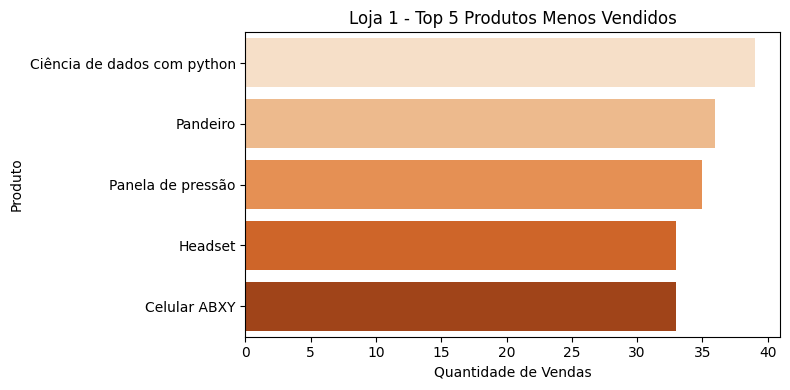

/tmp/ipython-input-929552770.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vendas', y='Produto', data=bottom_5, palette='Oranges')


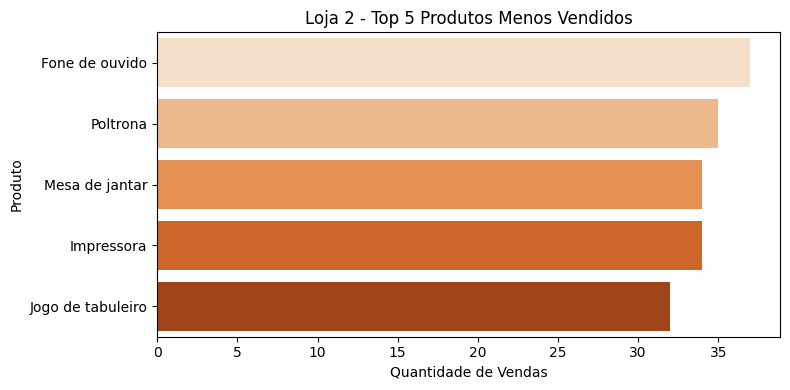

/tmp/ipython-input-929552770.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vendas', y='Produto', data=bottom_5, palette='Oranges')


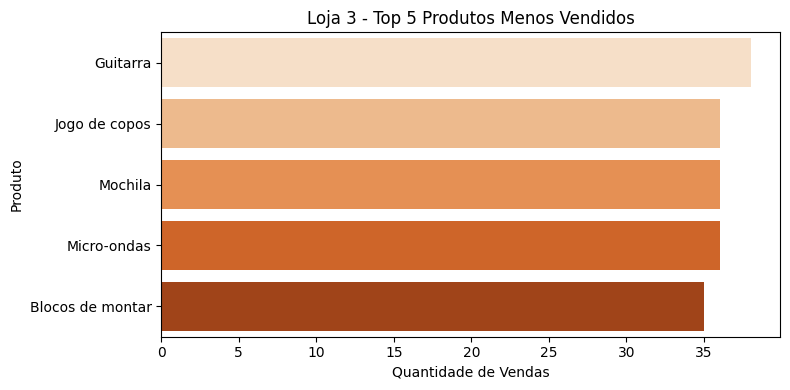

/tmp/ipython-input-929552770.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vendas', y='Produto', data=bottom_5, palette='Oranges')


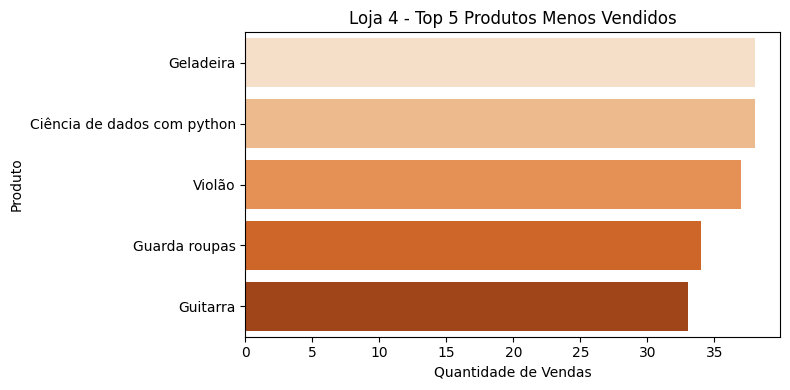

In [33]:
for nome_loja, df in produtos_por_loja.items():
    bottom_5 = df.tail(5)

    plt.figure(figsize=(8, 4))
    sns.barplot(x='Vendas', y='Produto', data=bottom_5, palette='Oranges')
    plt.title(f'{nome_loja} - Top 5 Produtos Menos Vendidos')
    plt.xlabel('Quantidade de Vendas')
    plt.ylabel('Produto')
    plt.tight_layout()
    plt.show()

# **5. Frete Médio por Loja**

In [34]:
frete_media = {}

for i in range(1,5):
  nome_loja = f"Loja {i}"
  df_loja = lojas_df[nome_loja]

  media_por_loja = df_loja['Frete'].mean()
  frete_media[nome_loja] = media_por_loja

for loja, media_por_loja in frete_media.items():
  print(f"{loja}: {media_por_loja:.2f}")

Loja 1: 34.69
Loja 2: 33.62
Loja 3: 33.07
Loja 4: 31.28


/tmp/ipython-input-4155397785.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lojas_frete, y=valores_frete, palette='Purples')


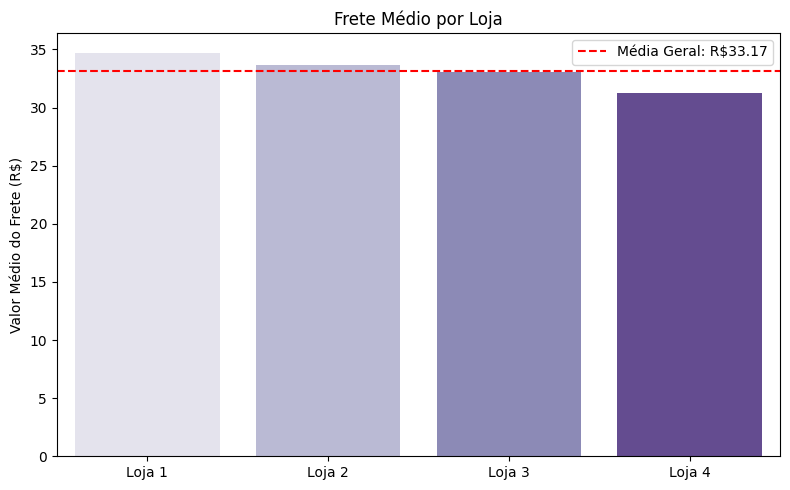

In [35]:
lojas_frete = list(frete_media.keys())
valores_frete = list(frete_media.values())
frete_geral = sum(valores_frete) / len(valores_frete)

plt.figure(figsize=(8, 5))
sns.barplot(x=lojas_frete, y=valores_frete, palette='Purples')
plt.axhline(frete_geral, color='red', linestyle='--', label=f'Média Geral: R${frete_geral:.2f}')
plt.title('Frete Médio por Loja')
plt.ylabel('Valor Médio do Frete (R$)')
plt.legend()
plt.tight_layout()
plt.show()

# Relatório

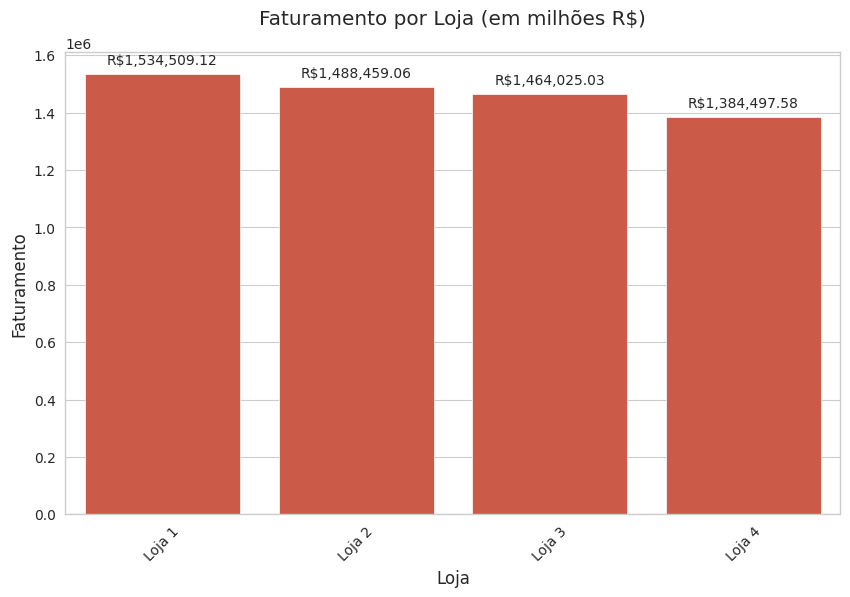

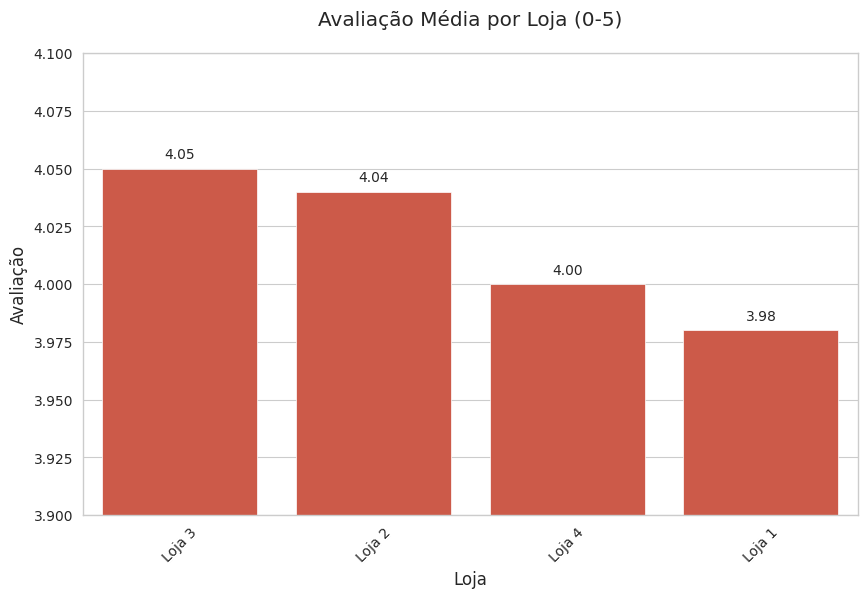

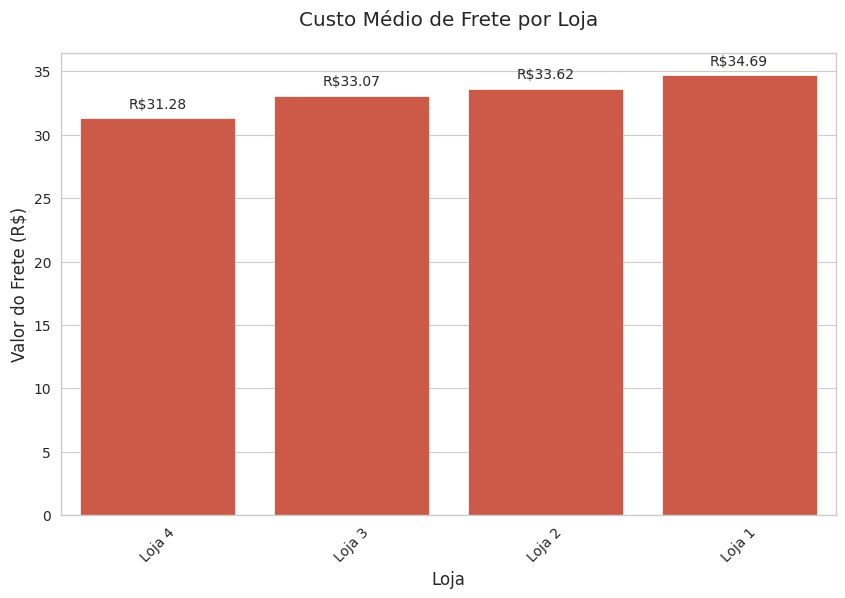


🔍 Conclusão:
A Loja 4 apresenta:
- Menor faturamento (R$1.384.497,58)
- Avaliação mediana (4.00)
- Frete mais barato (R$31,28), porém sem conversão em vendas
- Maior abrangência geográfica (25 estados)

🎯 Recomendação:
Venda da Loja 4 é a opção estratégica, pois:
1. Desempenho abaixo da média em múltiplos indicadores
2. Capilaridade não compensa resultados operacionais
3. Potencial de valorização pelo alcance geográfico



In [37]:
# 📊 Análise de Desempenho de Lojas - Google Colab (Versão Corrigida)
# Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de visualização (usando estilo disponível)
plt.style.use('ggplot')  # Alterado para um estilo disponível
sns.set_style("whitegrid")  # Usando estilo do Seaborn que está disponível

# Dados de faturamento
faturamento = {
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Valor (R$)': [1534509.12, 1488459.06, 1464025.03, 1384497.58]
}
df_faturamento = pd.DataFrame(faturamento)

# Visualização
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Loja', y='Valor (R$)', data=df_faturamento)
plt.title('Faturamento por Loja (em milhões R$)', pad=20)
plt.ylabel('Faturamento')
plt.xticks(rotation=45)

# Adicionando valores nas barras
for p in ax.patches:
    ax.annotate(f'R${p.get_height():,.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

# Dados de avaliação
avaliacao = {
    'Loja': ['Loja 3', 'Loja 2', 'Loja 4', 'Loja 1'],
    'Nota': [4.05, 4.04, 4.00, 3.98]
}
df_avaliacao = pd.DataFrame(avaliacao)

# Visualização
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Loja', y='Nota', data=df_avaliacao)
plt.title('Avaliação Média por Loja (0-5)', pad=20)
plt.ylabel('Avaliação')
plt.ylim(3.9, 4.1)
plt.xticks(rotation=45)

# Adicionando valores nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

# Dados de frete
frete = {
    'Loja': ['Loja 4', 'Loja 3', 'Loja 2', 'Loja 1'],
    'Custo (R$)': [31.28, 33.07, 33.62, 34.69]
}
df_frete = pd.DataFrame(frete)

# Visualização
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Loja', y='Custo (R$)', data=df_frete)
plt.title('Custo Médio de Frete por Loja', pad=20)
plt.ylabel('Valor do Frete (R$)')
plt.xticks(rotation=45)

# Adicionando valores nas barras
for p in ax.patches:
    ax.annotate(f'R${p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

# Conclusão Analítica
print("""
🔍 Conclusão:
A Loja 4 apresenta:
- Menor faturamento (R$1.384.497,58)
- Avaliação mediana (4.00)
- Frete mais barato (R$31,28), porém sem conversão em vendas
- Maior abrangência geográfica (25 estados)

🎯 Recomendação:
Venda da Loja 4 é a opção estratégica, pois:
1. Desempenho abaixo da média em múltiplos indicadores
2. Capilaridade não compensa resultados operacionais
3. Potencial de valorização pelo alcance geográfico
""")